In [ ]:
install.packages("ggplot2")
install.packages("ggrepel")
install.packages("dplyr")

library(ggplot2)
library(ggrepel)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
data = "https://gist.githubusercontent.com/stephenturner/806e31fce55a8b7175af/raw/1a507c4c3f9f1baaa3a69187223ff3d3050628d4/results.txt"
df <- read.table(data, header=TRUE)
head(df)

,Gene,log2FoldChange,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>
1,DOK6,0.5100,1.861e-08,0.0003053
2,TBX5,-2.1290,5.655e-08,0.0004191
3,SLC32A1,0.9003,7.664e-08,0.0004191
4,IFITM1,-1.6870,3.735e-06,0.0068090
5,NUP93,0.3659,3.373e-06,0.0068090
6,EMILIN2,1.5340,2.976e-06,0.0068090


In [ ]:
df$logP <- -log10(df$pval)

In [ ]:
df$Significance <- "Not Significant"
df$Significance[df$pvalue < 0.01 & df$log2FoldChange > 1] <- "Upregulated"
df$Significance[df$pvalue < 0.01 & df$log2FoldChange < -1] <- "Downregulated"

upregulated_genes <- df %>% filter(Significance == "Upregulated") %>% arrange(desc(log2FoldChange))
downregulated_genes <- df %>% filter(Significance == "Downregulated") %>% arrange(log2FoldChange)

head(upregulated_genes, 5)

head(downregulated_genes, 5)


,Gene,log2FoldChange,pvalue,padj,logP,Significance
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,DTHD1,1.540,5.594e-05,0.043710,4.252278,Upregulated
2,EMILIN2,1.534,2.976e-06,0.006809,5.526367,Upregulated
3,PI16,1.495,1.297e-04,0.077940,3.887060,Upregulated
4,C4orf45,1.288,2.472e-04,0.115900,3.606952,Upregulated
5,FAM180B,1.249,1.146e-03,0.239900,2.940815,Upregulated


,Gene,log2FoldChange,pvalue,padj,logP,Significance
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,TBX5,-2.129,5.655e-08,0.0004191,7.247567,Downregulated
2,IFITM1,-1.687,3.735e-06,0.0068090,5.427709,Downregulated
3,TNN,-1.658,8.973e-06,0.0147200,5.047062,Downregulated
4,COL13A1,-1.647,1.394e-05,0.0159200,4.855737,Downregulated
5,IFITM3,-1.610,1.202e-05,0.0159200,4.920096,Downregulated


# Gene Expression Analysis

## Upregulated Genes  

| GENE   | DESCRIPTION                                   | FUNCTION  |
|--------|-----------------------------------------------|-----------|
| **DTHD1**  | Death Domain Containing 1  | Contains a death domain involved in apoptosis and signaling pathways. |
| **EMILIN2**  | Elastin Microfibril Interfacer 2  | Contributes to extracellular matrix elasticity and regulates angiogenesis, immune response, and platelet aggregation. |
| **PI16**  | Peptidase Inhibitor 16  | Acts as a peptidase inhibitor and plays a role in negative regulation of cell growth, particularly in cardiac muscle development. |
| **CYTL1 (C4orf4)**  | Cytokine Like 1  | Expressed in bone marrow and cord blood cells; involved in immune signaling and linked to neurological and immune-related diseases. |
| **FAM180B**  | Family With Sequence Similarity 180 Member B  | Found in the extracellular region and associated with immune function and extracellular matrix interactions. |

## Downregulated Genes  

| GENE   | DESCRIPTION                                   | FUNCTION  |
|--------|-----------------------------------------------|-----------|
| **TBX5**  | T-Box Transcription Factor 5  | A DNA-binding protein that regulates heart development and limb pattern formation. |
| **IFITM1**  | Interferon Induced Transmembrane Protein 1  | Restricts cellular entry of various viruses, including influenza, Ebola, and SARS-CoV-2. |
| **TNN**  | Tenascin N  | Involved in cell adhesion, migration, and angiogenesis; interacts with integrins in the extracellular matrix. |
| **COL13A1**  | Collagen Type XIII Alpha 1 Chain  | Plays a role in cell-matrix and cell-cell adhesion, essential for normal development and neuromuscular junction function. |
| **IFITM3**  | Interferon Induced Transmembrane Protein 3  | Inhibits viral fusion and entry by altering cholesterol metabolism; active against multiple viruses including influenza, HIV, and coronaviruses. |


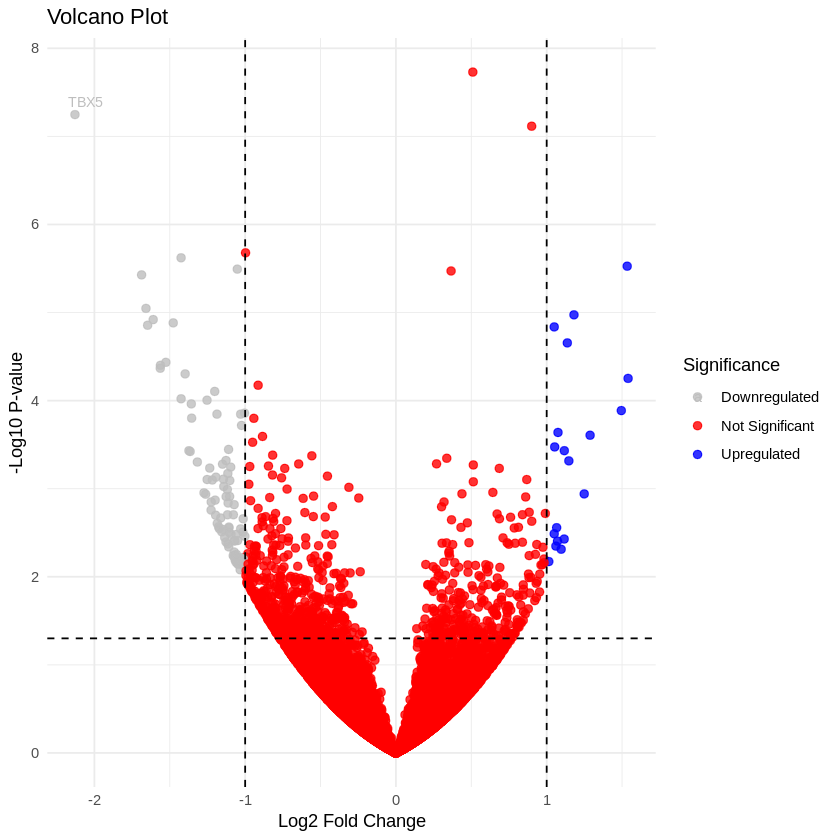

In [ ]:
ggplot(df, aes(x = log2FoldChange, y = logP, color = Significance)) +
  geom_point(alpha = 0.8, size = 2) +
  scale_color_manual(values = c("gray", "red", "blue")) +
  geom_vline(xintercept = c(-1, 1), linetype = "dashed") +
  geom_hline(yintercept = -log10(0.05), linetype = "dashed") +
  geom_text_repel(data = subset(df, pvalue < 0.01 & abs(log2FoldChange) > 2), aes(label = Gene), size = 3) +
  labs(title = "Volcano Plot", x = "Log2 Fold Change", y = "-Log10 P-value") +
  theme_minimal()
